# [Section1 Project] 다음 분기에 어떤 게임을 설계해야할까

데이터자료: https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv

**반드시 들어가야 하는 내용**

- 지역에 따라서 선호하는 게임 장르
- 연도별 게임의 트렌드
- 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [ ]:
# import essential libraries
import sqlite3
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
%matplotlib inline

**Data Description**

- Name : 게임의 이름
- Platform : 게임이 지원되는 플랫폼의 이름
- Year : 게임이 출시된 연도
- Genre : 게임의 장르
- Publisher : 게임을 제작한 회사
- NA_Sales : 북미지역에서의 출고량
- EU_Sales : 유럽지역에서의 출고량
- JP_Sales : 일본지역에서의 출고량
- Other_Sales : 기타지역에서의 출고량

In [ ]:
# read_csv
df_base = pd.read_csv('/content/vgames2.csv', index_col = 0)
df_base

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df_base.info()
# Platform, Year, Genre에 NaN 존재 → 연도별 선호도 조사시 dropna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


##연도별 Platform, Genre, Publisher 발매 수

In [ ]:
df = df_base.copy()
# 전처리
df.dropna(inplace=True)
# year 이상한 값 제거
condition = df['Year']>1900
df= df[condition]
df.sort_values('Year').reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0,0.01
1,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0,0
2,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0,0.01
3,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0,0K
4,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0,0.03
...,...,...,...,...,...,...,...,...,...
16136,Psycho-Pass: Mandatory Happiness,PSV,2016.0,Adventure,Nippon Ichi Software,0,0.01,0.01,0
16137,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0,0,0.01,0
16138,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0,0,0.03,0
16139,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0,0,0.01,0


In [190]:
# Unique 
plat_u = np.unique(df['Platform'].values)
gen_u = np.unique(df['Genre'].values)
pub_u = np.unique(df['Publisher'].values)
y_u = np.unique(df['Year'].values)
print('platform 종류: ',plat_u)
print()
print('genre 종류: ', gen_u)
print()
print('publisher: ', len(pub_u), '개')

platform 종류:  ['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']

genre 종류:  ['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']

publisher:  573 개


In [ ]:
# Platform
df_year = df.groupby(['Year','Platform'],as_index=False).agg(platform_count=('Platform','count')).sort_values(['Year']).reset_index(drop=True)
df_year.set_index('Year',inplace=True)
pd.set_option('display.max_rows', 15)
df_year

,Platform,platform_count
Year,,
1980.0,2600,8
1981.0,2600,46
1982.0,2600,36
1983.0,2600,11
1983.0,NES,6
...,...,...
2016.0,X360,8
2016.0,XOne,54
2017.0,PSV,2


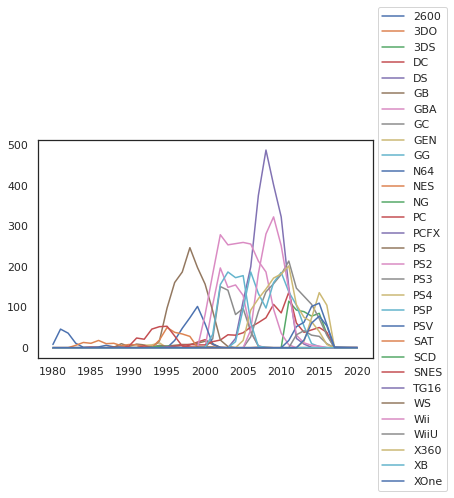

In [ ]:
# 전체기간 platform
df_plat = pd.DataFrame(columns=plat_u, index=y_u)
for i in range(len(df_plat.index)):    # 0~38 (39개)
    for index, row in df_year.iterrows():  # index= = 1980~2020, row(241개)
        if index == df_plat.index[i] : df_plat.loc[index, row['Platform']]=row['platform_count']
pd.set_option('display.max_columns', None)
df_plat.fillna(0,inplace=True)
df_plat.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

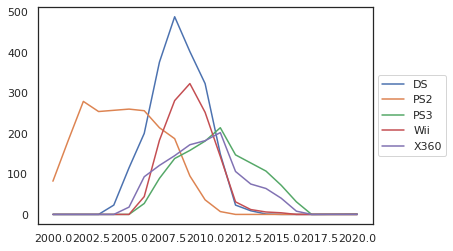

In [ ]:
# k년도 이후 기간 동안 n번 이상 발매된 platform에 대해 
def find_k(df,k):
    return list((df.index == k)).index(True)
k=2000
n=1200
df_plat = df_plat.iloc[find_k(df_plat,k):,:]
df_c = df_year.iloc[find_k(df_year,k):,:].groupby('Platform').agg(count =('platform_count','sum')).sort_values('count',ascending=False)
condition = list(df_c[df_c['count']>n].index)
df_plat[condition].plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
# Genre
df_year = df.groupby(['Year','Genre'],as_index=False).agg(genre_count=('Genre','count')).sort_values(['Year']).reset_index(drop=True)
df_year.set_index('Year',inplace=True)
df_year

,Genre,genre_count
Year,,
1980.0,Action,1
1980.0,Fighting,1
1980.0,Misc,4
1980.0,Shooter,2
1981.0,Simulation,1
...,...,...
2016.0,Action,117
2016.0,Racing,19
2017.0,Role-Playing,2


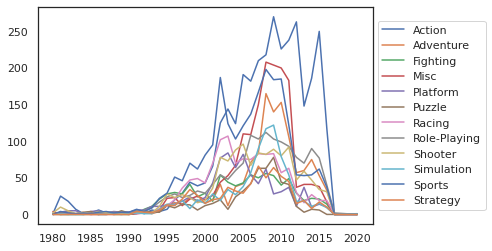

In [ ]:
# 전체기간 Genre
df_gen = pd.DataFrame(columns=gen_u, index=y_u)
for i in range(len(df_gen.index)):    # 0~38 (39개)
    for index, row in df_year.iterrows():  # index= = 1980~2020, row(241개)
        if index == df_gen.index[i] : df_gen.loc[index, row['Genre']]=row['genre_count']
pd.set_option('display.max_columns', None)
df_gen.fillna(0,inplace=True)
df_gen.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

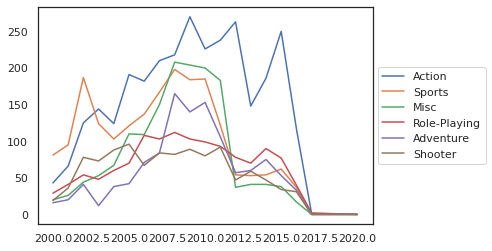

In [ ]:
# k년도 이후 기간 동안 n번 이상 발매된 Genre에 대해 
def find_k(df,k):
    return list((df.index == k)).index(True)
k=2000
n=1100
df_gen = df_gen.iloc[find_k(df_gen,k):,:]
df_c = df_year.iloc[find_k(df_year,k):,:].groupby('Genre').agg(count =('genre_count','sum')).sort_values('count',ascending=False)
condition = list(df_c[df_c['count']>n].index)
df_gen[condition].plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
# Publisher
df_year = df.groupby(['Year','Publisher'],as_index=False).agg(publisher_count=('Publisher','count')).sort_values(['Year']).reset_index(drop=True)
df_year.set_index('Year',inplace=True)
df_year

,Publisher,publisher_count
Year,,
1980.0,Activision,4
1980.0,Atari,4
1981.0,Unknown,1
1981.0,Tigervision,2
1981.0,Taito,1
...,...,...
2016.0,Electronic Arts,20
2016.0,Happinet,1
2017.0,Sega,2


In [ ]:
# 전체기간 Publisher
df_pub = pd.DataFrame(columns=pub_u, index=y_u)
for i in range(len(df_pub.index)):    # 0~38 (39개)
    for index, row in df_year.iterrows():  # index= = 1980~2020, row(241개)
        if index == df_pub.index[i] : df_pub.loc[index, row['Publisher']]=row['publisher_count']
df_pub.fillna(0,inplace=True)

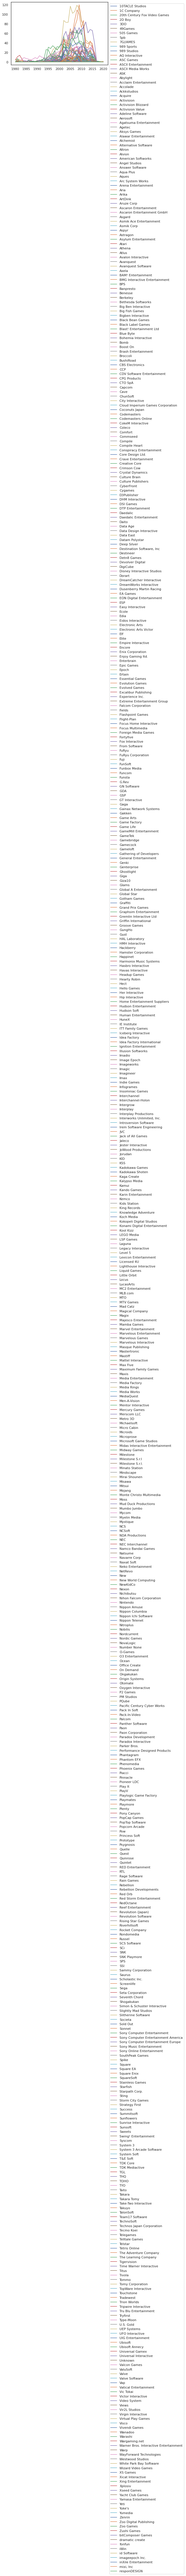

In [ ]:
df_pub.plot()
plt.legend(bbox_to_anchor=(1,1))

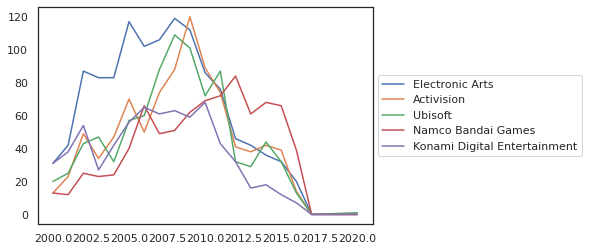

In [ ]:
# k년도 이후 기간 n번 이상 발매된 Publisher에 대해 
def find_k(df,k):
    return list((df.index == k)).index(True)
k=2000
n=690
df_pub = df_pub.iloc[find_k(df_pub,k):,:]
df_c = df_year.iloc[find_k(df_year,k):,:].groupby('Publisher').agg(count =('publisher_count','sum')).sort_values('count',ascending=False)
condition = list(df_c[df_c['count']>n].index)
df_pub[condition].plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
# 년도가 year_min ~ year_max 때, column별 count
def count(df_x,min,max,column):
    df_x= df.query("Year >=@min & Year < @max").groupby([column],as_index=False).agg(count=(column,'count')).sort_values(['count'], ascending=False).reset_index(drop=True)
    return df_x

In [ ]:
df_pub = pd.DataFrame()
df_plat = pd.DataFrame()
df_gen = pd.DataFrame()
df_1980 = pd.DataFrame() # 1980년대
df_1990 = pd.DataFrame() # 1990년대
df_2000 = pd.DataFrame() # 2000년대
df_2010 = pd.DataFrame() # 2010년대

# 연도별 publisher, platform, genre count
def yearly_count(df, min, max):
    df = pd.concat([count(df_pub,min,max,'Publisher'), count(df_plat,min,max,'Platform'), count(df_gen,min,max,'Genre')], axis=1)
    return df

df_1980 = yearly_count(df_1980,0,1990)
df_1990 = yearly_count(df_1990,1990,2000)
df_2000 = yearly_count(df_2000,2000,2010)
df_2010 = yearly_count(df_2010,2010,2030)

### Result

In [ ]:
df_year_all = pd.concat([df_1980.head(7), df_1990.head(7), df_2000.head(7), df_2010.head(7)], axis=1).drop('count',axis=1) # 전년도와 2000년대 이후 트렌드 비교

In [ ]:
# 1980년대 1990년대 2000년대 2010년대 publisher 순위 변화
df_yearly = df_year_all['Publisher']
df_yearly.columns = [1980,1990,2000,2010]
df_yearly

,1980,1990,2000,2010
0,Nintendo,Sony Computer Entertainment,Electronic Arts,Namco Bandai Games
1,Atari,Nintendo,Ubisoft,Electronic Arts
2,Activision,Konami Digital Entertainment,Activision,Activision
3,Namco Bandai Games,Sega,THQ,Ubisoft
4,Mattel Interactive,Electronic Arts,Konami Digital Entertainment,Konami Digital Entertainment
5,Capcom,Acclaim Entertainment,Sony Computer Entertainment,Warner Bros. Interactive Entertainment
6,Parker Bros.,Namco Bandai Games,Namco Bandai Games,Nintendo


In [ ]:
# 1980년대 1990년대 2000년대 2010년대 Platform 순위 변화
df_yearly = df_year_all['Platform']
df_yearly.columns = [1980,1990,2000,2010]
df_yearly

,1980,1990,2000,2010
0,2600,PS,PS2,PS3
1,NES,N64,DS,X360
2,GB,SNES,Wii,DS
3,PC,SAT,XB,PSP
4,DS,GB,GBA,3DS
5,NaN,PC,PSP,PC
6,NaN,GEN,X360,Wii


In [ ]:
# 1980년대 1990년대 2000년대 2010년대 Genre 순위 변화
df_yearly = df_year_all['Genre']
df_yearly.columns = [1980,1990,2000,2010]
df_yearly

,1980,1990,2000,2010
0,Action,Sports,Action,Action
1,Platform,Fighting,Sports,Sports
2,Shooter,Racing,Misc,Misc
3,Sports,Role-Playing,Racing,Role-Playing
4,Puzzle,Action,Role-Playing,Adventure
5,Role-Playing,Shooter,Shooter,Shooter
6,Misc,Platform,Adventure,Racing




---


##지역별 Platform, Genre, Publisher에 대한 출고량

In [ ]:
df_area = df_base.copy()
# NA, EU, JP, Other 출고량 사이의 관계 확인
df_area_only = df_area[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df_area_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NA_Sales     16598 non-null  object
 1   EU_Sales     16598 non-null  object
 2   JP_Sales     16598 non-null  object
 3   Other_Sales  16598 non-null  object
dtypes: object(4)
memory usage: 648.4+ KB


In [ ]:
# 데이터 분석을 위해 object type → float type
for column in list(df_area_only.columns):
    df_area_only[column] = pd.to_numeric(df_area_only[column], errors='coerce')
df_area_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NA_Sales     16398 non-null  float64
 1   EU_Sales     16398 non-null  float64
 2   JP_Sales     16399 non-null  float64
 3   Other_Sales  16398 non-null  float64
dtypes: float64(4)
memory usage: 648.4 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<Figure size 216x216 with 0 Axes>

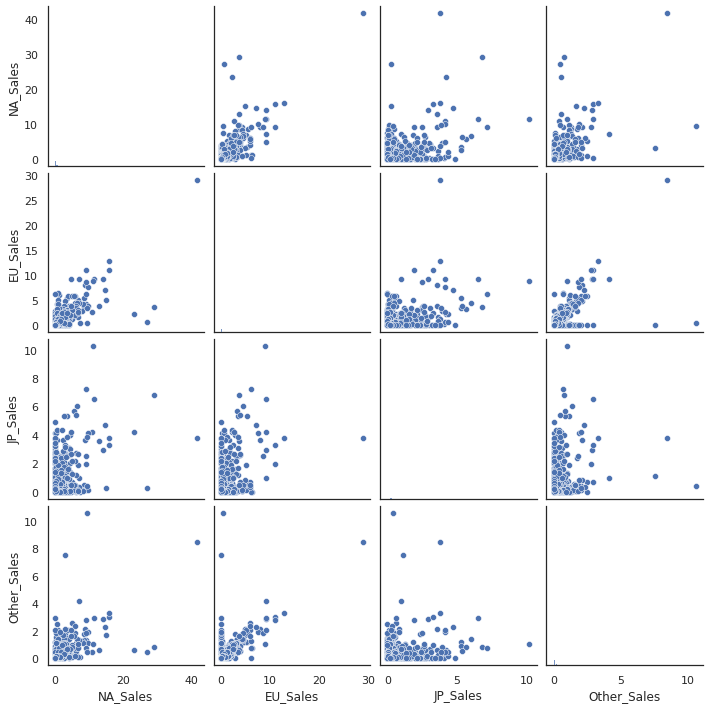

In [ ]:
df_area_only.dropna(inplace=True)
# 전체 데이터 시각화 → 각 지역 출고량 관계 보기 위해
plt.figure(figsize = (3,3))
sns.pairplot(df_area_only)
plt.show()

In [162]:
# 전처리
area_columns = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
for column in area_columns:
    df_area[column] = pd.to_numeric(df_area[column], errors='coerce')
df_area.dropna(inplace=True)

In [ ]:
# 년도가 yearmin ~ yearmax 일 때, column별 area 지역의 출고량 합
def sales(df,min,max,area,column):
    df = df_area.query("Year >=@min & Year < @max").groupby([column],as_index=False).agg(total_sales=(area,'sum')).sort_values(['total_sales'], ascending=False).reset_index(drop=True)
    condition = df[df['total_sales'] ==0].index
    df.drop(condition, inplace=True)
    return df

# 연도별 출고량 합
def yearly_count(df, min, max, area):
    df = pd.concat([sales(df_pub,min,max,area,'Publisher'), sales(df_plat,min,max,area,'Platform'), sales(df_gen,min,max,area,'Genre')], axis=1)
    return df

In [160]:
# 연도별 Publisher, Platform, Genre에 대한 출고량
# NA
df_pub = pd.DataFrame()
df_plat = pd.DataFrame()
df_gen = pd.DataFrame()
na_1980 = pd.DataFrame() # 1980년대
na_1990 = pd.DataFrame() # 1990년대
na_2000 = pd.DataFrame() # 2000년대
na_2010 = pd.DataFrame() # 2010년대

na_1980 = yearly_count(na_1980,0,1990,'NA_Sales')
na_1990 = yearly_count(na_1990,1990,2000,'NA_Sales')
na_2000 = yearly_count(na_2000,2000,2010,'NA_Sales')
na_2010 = yearly_count(na_2010,2010,2030,'NA_Sales')

In [ ]:
# 연도별 Publisher, Platform, Genre에 대한 출고량
# EU 
df_pub = pd.DataFrame()
df_plat = pd.DataFrame()
df_gen = pd.DataFrame()
eu_1980 = pd.DataFrame() # 1980년대
eu_1990 = pd.DataFrame() # 1990년대
eu_2000 = pd.DataFrame() # 2000년대
eu_2010 = pd.DataFrame() # 2010년대

eu_1980 = yearly_count(eu_1980,0,1990,'EU_Sales')
eu_1990 = yearly_count(eu_1990,1990,2000,'EU_Sales')
eu_2000 = yearly_count(eu_2000,2000,2010,'EU_Sales')
eu_2010 = yearly_count(eu_2010,2010,2030,'EU_Sales')

In [ ]:
# 연도별 Publisher, Platform, Genre에 대한 출고량
# JP
df_pub = pd.DataFrame()
df_plat = pd.DataFrame()
df_gen = pd.DataFrame()
jp_1980 = pd.DataFrame() # 1980년대
jp_1990 = pd.DataFrame() # 1990년대
jp_2000 = pd.DataFrame() # 2000년대
jp_2010 = pd.DataFrame() # 2010년대

jp_1980 = yearly_count(jp_1980,0,1990,'JP_Sales')
jp_1990 = yearly_count(jp_1990,1990,2000,'JP_Sales')
jp_2000 = yearly_count(jp_2000,2000,2010,'JP_Sales')
jp_2010 = yearly_count(jp_2010,2010,2030,'JP_Sales')

In [ ]:
# 연도별 Publisher, Platform, Genre에 대한 출고량
# Other
df_pub = pd.DataFrame()
df_plat = pd.DataFrame()
df_gen = pd.DataFrame()
ot_1980 = pd.DataFrame() # 1980년대
ot_1990 = pd.DataFrame() # 1990년대
ot_2000 = pd.DataFrame() # 2000년대
ot_2010 = pd.DataFrame() # 2010년대

ot_1980 = yearly_count(ot_1980,0,1990,'Other_Sales')
ot_1990 = yearly_count(ot_1990,1990,2000,'Other_Sales')
ot_2000 = yearly_count(ot_2000,2000,2010,'Other_Sales')
ot_2010 = yearly_count(ot_2010,2010,2030,'Other_Sales')

### Result

연도별 선호 조사 후, 근래 선호 순위 1~3위와 꾸준히 순위권에 등장하는 것 하나를 추가적으로 선택
- 장르에서 misc(기타)는 제외

In [ ]:
# NA
na_all = pd.concat([na_1980.head(7), na_1990.head(7), na_2000.head(7), na_2010.head(7)], axis=1).drop('total_sales',axis=1) 

In [ ]:
# Publisher
df_yearly = na_all['Publisher']
df_yearly.columns = [1980,1990,2000,2010]
df_yearly

,1980,1990,2000,2010
0,Nintendo,Nintendo,Nintendo,Activision
1,Atari,Sony Computer Entertainment,Electronic Arts,Electronic Arts
2,Activision,Electronic Arts,Activision,Ubisoft
3,Capcom,Acclaim Entertainment,THQ,Nintendo
4,Bethesda Softworks,Eidos Interactive,Ubisoft,Take-Two Interactive
5,Parker Bros.,Sega,Sony Computer Entertainment,Microsoft Game Studios
6,Imagic,GT Interactive,Take-Two Interactive,Warner Bros. Interactive Entertainment


In [ ]:
# Platform
df_yearly = na_all['Platform']
df_yearly.columns = [1980,1990,2000,2010]
df_yearly

,1980,1990,2000,2010
0,NES,PS,PS2,X360
1,2600,N64,Wii,PS3
2,GB,SNES,DS,Wii
3,DS,GB,X360,PS4
4,X360,PC,XB,XOne
5,PS2,GEN,GBA,3DS
6,PSP,NES,PS3,DS


In [ ]:
# Genre
df_yearly = na_all['Genre']
df_yearly.columns = [1980,1990,2000,2010]
df_yearly

,1980,1990,2000,2010
0,Platform,Platform,Action,Action
1,Shooter,Sports,Sports,Shooter
2,Puzzle,Racing,Shooter,Sports
3,Action,Action,Misc,Misc
4,Sports,Fighting,Racing,Role-Playing
5,Role-Playing,Role-Playing,Platform,Platform
6,Racing,Shooter,Role-Playing,Racing


북미가 선호하는 
1. 회사 : Activision, Electronic Arts, Ubisoft, Nintendo
2. 플랫폼 : X360, PS3, Wii, DS
3. 장르 : Action, Shooter, Sports, Role-Playing

In [ ]:
# EU
eu_all = pd.concat([eu_1980.head(7), eu_1990.head(7), eu_2000.head(7), eu_2010.head(7)], axis=1).drop('total_sales',axis=1) 

In [ ]:
# Publisher
df_yearly = eu_all['Publisher']
df_yearly.columns = [1980,1990,2000,2010]
df_yearly

,1980,1990,2000,2010
0,Nintendo,Nintendo,Nintendo,Electronic Arts
1,Bethesda Softworks,Sony Computer Entertainment,Electronic Arts,Activision
2,Atari,Electronic Arts,Activision,Ubisoft
3,Capcom,Eidos Interactive,Sony Computer Entertainment,Nintendo
4,Electronic Arts,Activision,Ubisoft,Take-Two Interactive
5,Sony Computer Entertainment,Virgin Interactive,THQ,Sony Computer Entertainment
6,Activision,GT Interactive,Take-Two Interactive,Warner Bros. Interactive Entertainment


In [ ]:
# Platform
df_yearly = eu_all['Platform']
df_yearly.columns = [1980,1990,2000,2010]
df_yearly

,1980,1990,2000,2010
0,NES,PS,PS2,PS3
1,GB,GB,Wii,X360
2,2600,N64,DS,PS4
3,X360,SNES,PS3,PC
4,DS,PC,X360,Wii
5,PS2,GEN,GBA,3DS
6,PS4,NES,PSP,XOne


In [ ]:
# Genre
df_yearly = eu_all['Genre']
df_yearly.columns = [1980,1990,2000,2010]
df_yearly

,1980,1990,2000,2010
0,Platform,Platform,Action,Action
1,Role-Playing,Racing,Sports,Shooter
2,Puzzle,Action,Racing,Sports
3,Action,Sports,Misc,Misc
4,Sports,Role-Playing,Shooter,Role-Playing
5,Shooter,Fighting,Platform,Racing
6,Racing,Shooter,Role-Playing,Platform


유럽이 선호하는
1. 회사 : Electronic Arts, Activision, Ubisoft, Nintendo
2. 플랫폼 : PS3, X360, PS4, Wii
3. 장르 : Action, Shooter, Sports, Role-Playing

In [ ]:
# JP
jp_all = pd.concat([jp_1980.head(7), jp_1990.head(7), jp_2000.head(7), jp_2010.head(7)], axis=1).drop('total_sales',axis=1) 

In [ ]:
# Publisher
df_yearly = jp_all['Publisher']
df_yearly.columns = [1980,1990,2000,2010]
df_yearly

,1980,1990,2000,2010
0,Nintendo,Nintendo,Nintendo,Nintendo
1,Namco Bandai Games,Sony Computer Entertainment,Namco Bandai Games,Namco Bandai Games
2,Hudson Soft,SquareSoft,Konami Digital Entertainment,Capcom
3,Enix Corporation,Konami Digital Entertainment,Capcom,Square Enix
4,Konami Digital Entertainment,Namco Bandai Games,Square Enix,Konami Digital Entertainment
5,Capcom,Sega,Sony Computer Entertainment,Level 5
6,SquareSoft,Capcom,Sega,Sega


In [ ]:
# Platform
df_yearly = jp_all['Platform']
df_yearly.columns = [1980,1990,2000,2010]
df_yearly

,1980,1990,2000,2010
0,NES,PS,DS,3DS
1,GB,SNES,PS2,PS3
2,DS,GB,Wii,PSP
3,SNES,SAT,GBA,DS
4,PSP,N64,PSP,PSV
5,SAT,NES,GC,PS4
6,3DS,DC,PS3,Wii


In [ ]:
# Genre
df_yearly = jp_all['Genre']
df_yearly.columns = [1980,1990,2000,2010]
df_yearly

,1980,1990,2000,2010
0,Platform,Role-Playing,Role-Playing,Role-Playing
1,Role-Playing,Platform,Misc,Action
2,Sports,Sports,Sports,Misc
3,Puzzle,Fighting,Action,Adventure
4,Action,Simulation,Platform,Platform
5,Shooter,Racing,Fighting,Sports
6,Misc,Puzzle,Simulation,Simulation


일본이 선호하는
1. 회사 : Nintendo, Namco Bandai Games, Capcom, Konami Digital Entertainment
2. 플랫폼 : 3DS, PS3, PSP, DS
3. 장르 : Role-Playing, Action, Adventure, Platform

In [ ]:
# Other
ot_all = pd.concat([ot_1980.head(7), ot_1990.head(7), ot_2000.head(7), ot_2010.head(7)], axis=1).drop('total_sales',axis=1) 

In [ ]:
# Publisher
df_yearly = ot_all['Publisher']
df_yearly.columns = [1980,1990,2000,2010]
df_yearly

,1980,1990,2000,2010
0,Nintendo,Sony Computer Entertainment,Electronic Arts,Electronic Arts
1,Capcom,Nintendo,Nintendo,Activision
2,Bethesda Softworks,Electronic Arts,Sony Computer Entertainment,Ubisoft
3,Atari,Virgin Interactive,Activision,Take-Two Interactive
4,Sony Computer Entertainment,Konami Digital Entertainment,Take-Two Interactive,Sony Computer Entertainment
5,Electronic Arts,Eidos Interactive,THQ,Nintendo
6,Take-Two Interactive,Activision,Ubisoft,Warner Bros. Interactive Entertainment


In [ ]:
# Platform
df_yearly = ot_all['Platform']
df_yearly.columns = [1980,1990,2000,2010]
df_yearly

,1980,1990,2000,2010
0,NES,PS,PS2,PS3
1,GB,GB,Wii,X360
2,PS2,SNES,DS,PS4
3,X360,N64,PS3,Wii
4,DS,PC,PSP,PC
5,2600,GEN,X360,3DS
6,PSP,NES,XB,XOne


In [ ]:
# Genre
df_yearly = ot_all['Genre']
df_yearly.columns = [1980,1990,2000,2010]
df_yearly

,1980,1990,2000,2010
0,Role-Playing,Platform,Action,Action
1,Platform,Action,Sports,Shooter
2,Puzzle,Racing,Racing,Sports
3,Shooter,Sports,Misc,Role-Playing
4,Sports,Role-Playing,Shooter,Misc
5,Action,Fighting,Platform,Racing
6,Racing,Shooter,Role-Playing,Platform


기타지역이 선호하는
1. 회사 : Electronic Arts, Activision, Ubisoft, Sony Computer Entertainment
2. 플랫폼 : PS3, X360, PS4, Wii
3. 장르 : Action, Shooter, Sports, Role-Playing



---


## 결과 정리
* 트렌드: 최근 1위로만 이루어짐
* 꾸준히 안정적: 연도별 순위에 등장빈도 높은 것들로 이루어짐

**북미에 출시할 경우**
1. 트렌드 : 회사- Activision, 플랫폼-X360, 장르- Action
2. 꾸준히 안정적 : 회사-Nintendo, 플랫폼- X360, 장르-Action

**유럽에 출시할 경우**
1. 트렌드 : 회사- Electronic Arts, 플랫폼-PS3, 장르- Action
2. 꾸준히 안정적 : 회사-Nintendo, 플랫폼- X360, 장르-Action

**일본에 출시할 경우**
1. 트렌드 : 회사- Nintendo, 플랫폼-3DS, 장르- Role-Playing
2. 꾸준히 안정적 : 회사-Nintendo, 플랫폼-PSP, 장르-Role-Playing


**다른지역에 출시할 경우**
1. 트렌드 : 회사- Electronic Arts, 플랫폼-PS3, 장르- Action
2. 꾸준히 안정적 : 회사-Electronic Arts, 플랫폼-X360, 장르-Action





---


## Question

### 1. 지역에 따라서 선호하는 게임 장르
1. 북미 :  Action, Shooter, Sports, Role-Playing
2. 유럽 : Action, Shooter, Sports, Role-Playing
3. 일본 : Role-Playing, Action, Adventure, Platform
4. 기타 : Action, Shooter, Sports, Role-Playing

###2. 연도별 게임의 트렌드

위 그래프 참고

###3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [180]:
# 전체 출고량 합계
df_area['total_sales'] = sum([df_area['NA_Sales'], df_area['EU_Sales'], df_area['JP_Sales'], df_area['Other_Sales']])
df_area['sales_normalize'] = df_area['total_sales'] / (2020-df_area['Year'])
# 전체 출고량 순위
df_area.sort_values('total_sales', ascending=False).reset_index(drop=True).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales,sales_normalize
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,5.910000
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1.149714
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,2.985833
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,3.000000
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,1.307500
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,0.976129
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2.143571
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,2.072143
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,2.600909
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,0.786389


(0.0, 6.0)

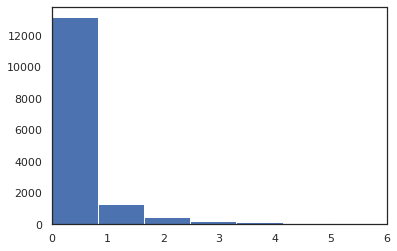

In [178]:
# 전체 출고량 별 histogram
plt.hist(df_area['total_sales'], bins=100)
plt.xlim(0,6)

In [179]:
# 판매 속도 순위
df_area.sort_values('sales_normalize', ascending=False).reset_index(drop=True).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales,sales_normalize
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,5.910000
1,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,3.055714
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,3.000000
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,2.985833
4,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,2.848000
5,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,2.600909
6,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,2.182000
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2.143571
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,2.072143
9,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,2.000000


(0.0, 6.0)

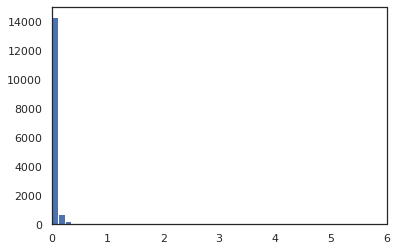

In [188]:
# 전체 판매속도 별 histogram
plt.hist(df_area['sales_normalize'], bins=50)
plt.xlim(0,6)

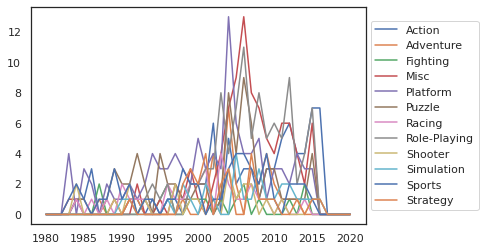

In [191]:
# 전체 출고량 및 판매 순위 모두 Wii Sports(Publisher: Nintendo)

# nintendo가 발매하는 genre에 대한 추이
df_nintendo = df_area[df_area['Publisher']=='Nintendo'].groupby(['Year','Genre'],as_index=False).agg(genre_count=('Genre','count')).sort_values(['Year']).reset_index(drop=True)
df_nintendo.set_index('Year',inplace=True)


df_gen = pd.DataFrame(columns=gen_u, index=y_u)
for i in range(len(df_gen.index)):    # 0~38 (39개)
    for index, row in df_nintendo.iterrows():  # index= = 1980~2020, row(241개)
        if index == df_gen.index[i] : df_gen.loc[index, row['Genre']]=row['genre_count']
df_gen.fillna(0,inplace=True)
df_gen.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

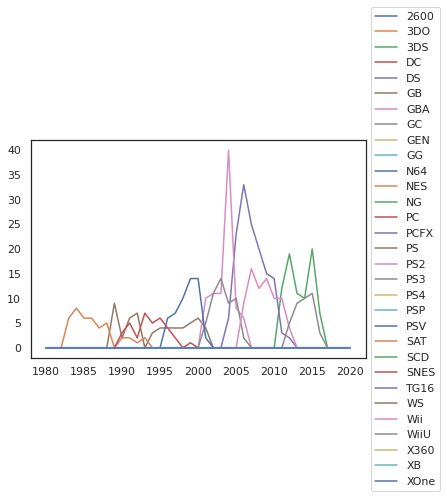

In [195]:
# nintendo가 발매하는 platform에 대한 추이
df_nintendo = df_area[df_area['Publisher']=='Nintendo'].groupby(['Year','Platform'],as_index=False).agg(platform_count=('Platform','count')).sort_values(['Year']).reset_index(drop=True)
df_nintendo.set_index('Year',inplace=True)

# 전체기간 platform
df_plat = pd.DataFrame(columns=plat_u, index=y_u)
for i in range(len(df_plat.index)):    # 0~38 (39개)
    for index, row in df_nintendo.iterrows():  # index= = 1980~2020, row(241개)
        if index == df_plat.index[i] : df_plat.loc[index, row['Platform']]=row['platform_count']
df_plat.fillna(0,inplace=True)
df_plat.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))